In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

%matplotlib inline 

In [43]:
df=pd.read_excel("E:/DS Course/Contraceptive_method_dataset.xlsx")
df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
df.shape

(1473, 10)

In [198]:
df[~df.applymap(np.isreal).all(1)]

C:\Users\jayee\AppData\Local\Temp\ipykernel_784\358654104.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[~df.applymap(np.isreal).all(1)]


Wife_age Wife_ education Husband_education  No_of_children_born  \
0         24.0         Primary         Secondary                  3.0   
1         45.0      Uneducated         Secondary                 10.0   
2         43.0         Primary         Secondary                  7.0   
3         42.0       Secondary           Primary                  9.0   
4         36.0       Secondary         Secondary                  8.0   
...        ...             ...               ...                  ...   
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0      Scientology           No                   2                     High   
1      Scientology           No                   3                Very High   
2      Scientology           No                   3                Very High   
3      Scientology           No                   3                     High   
4      Scientology           No                   3                      Low   
...            ...          ...                 ...                      ...   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
0            Exposed                        No  
1            Exposed                        No  
2            Exposed                        No  
3            Exposed                        No  
4            Exposed                        No  
...              ...                       ...  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes  

[1473 rows x 10 columns]

In [171]:
df.duplicated().sum()

80

In [172]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [6]:
np.round(df.describe(include="all"),2).T

count unique          top  freq   mean   std  \
Wife_age                   1402.0    NaN          NaN   NaN  32.61  8.27   
Wife_ education              1473      4     Tertiary   577    NaN   NaN   
Husband_education            1473      4     Tertiary   899    NaN   NaN   
No_of_children_born        1452.0    NaN          NaN   NaN   3.25  2.37   
Wife_religion                1473      2  Scientology  1253    NaN   NaN   
Wife_Working                 1473      2           No  1104    NaN   NaN   
Husband_Occupation         1473.0    NaN          NaN   NaN   2.14  0.86   
Standard_of_living_index     1473      4    Very High   684    NaN   NaN   
Media_exposure               1473      2      Exposed  1364    NaN   NaN   
Contraceptive_method_used    1473      2          Yes   844    NaN   NaN   

                            min   25%   50%   75%   max  
Wife_age                   16.0  26.0  32.0  39.0  49.0  
Wife_ education             NaN   NaN   NaN   NaN   NaN  
Husband_education           NaN   NaN   NaN   NaN   NaN  
No_of_children_born         0.0   1.0   3.0   4.0  16.0  
Wife_religion               NaN   NaN   NaN   NaN   NaN  
Wife_Working                NaN   NaN   NaN   NaN   NaN  
Husband_Occupation          1.0   1.0   2.0   3.0   4.0  
Standard_of_living_index    NaN   NaN   NaN   NaN   NaN  
Media_exposure              NaN   NaN   NaN   NaN   NaN  
Contraceptive_method_used   NaN   NaN   NaN   NaN   NaN

Univariate Analysis

In [44]:
cat=list(df.dtypes[df.dtypes=="object"].index)
num=list(df.dtypes[df.dtypes!="object"].index)

In [8]:
import matplotlib.style

In [9]:

def univariate_analysis_categorical(cat, i):
    
    vc = df[cat].value_counts()
    if len(vc.index)<=5:
        g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>5 and len(vc.index)<=15:
        g = sns.countplot(y=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)
    elif len(vc.index)>15:
        g = sns.countplot(x=cat, data=df, palette = 'pastel',order = df[cat].value_counts().index)
        g.set_xticklabels(labels = g.get_xticklabels(), rotation = 90)
    plt.show()
    print("\t")

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


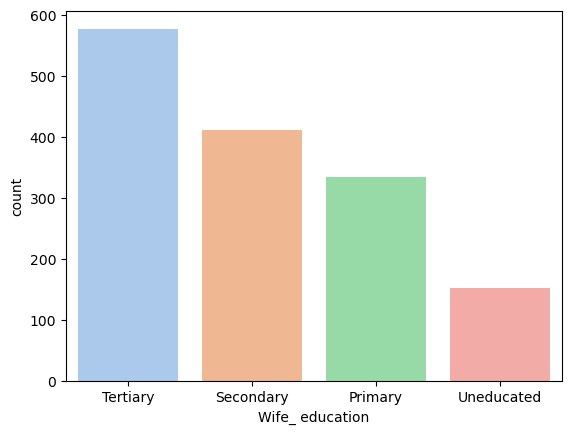

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


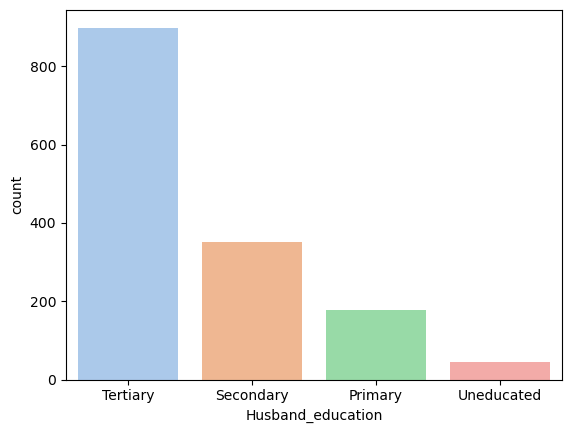

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


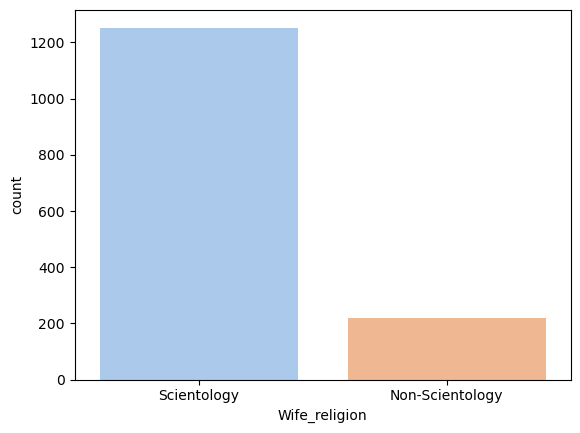

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


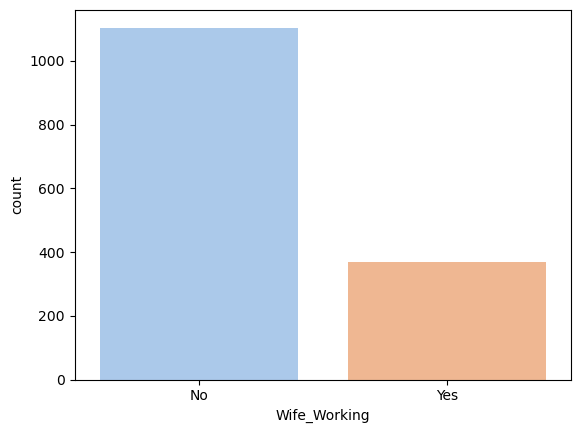

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


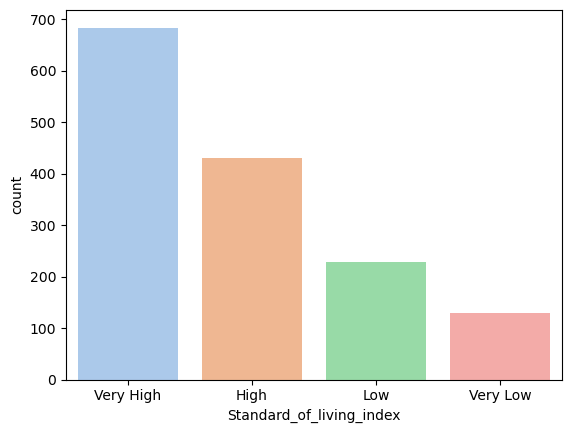

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


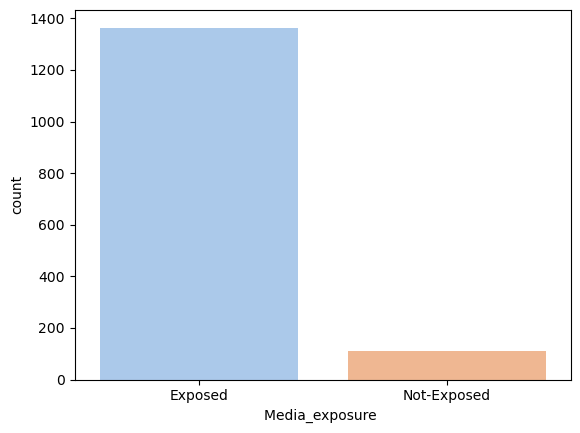

C:\Users\jayee\AppData\Local\Temp\ipykernel_7076\1660156465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x=cat, data=df, palette = 'pastel', order = df[cat].value_counts().index)


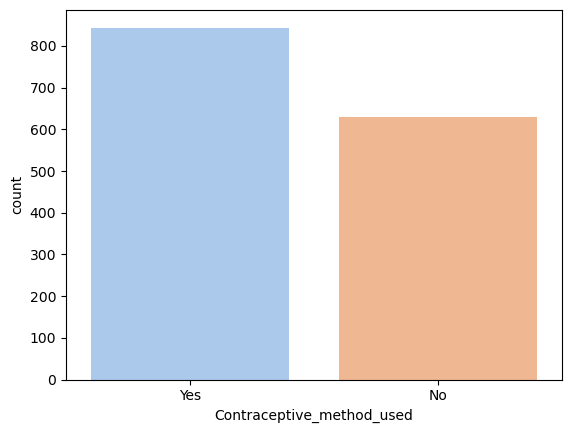

In [10]:
for i,x in enumerate(cat):
        univariate_analysis_categorical(x, i)  


C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


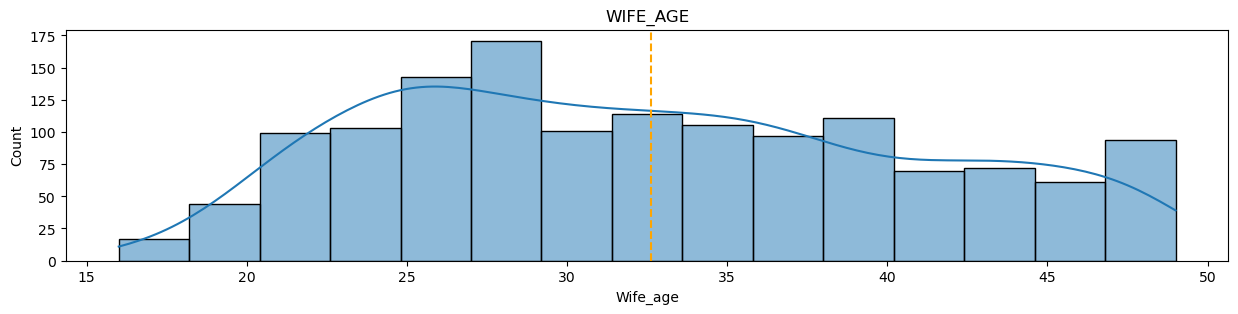

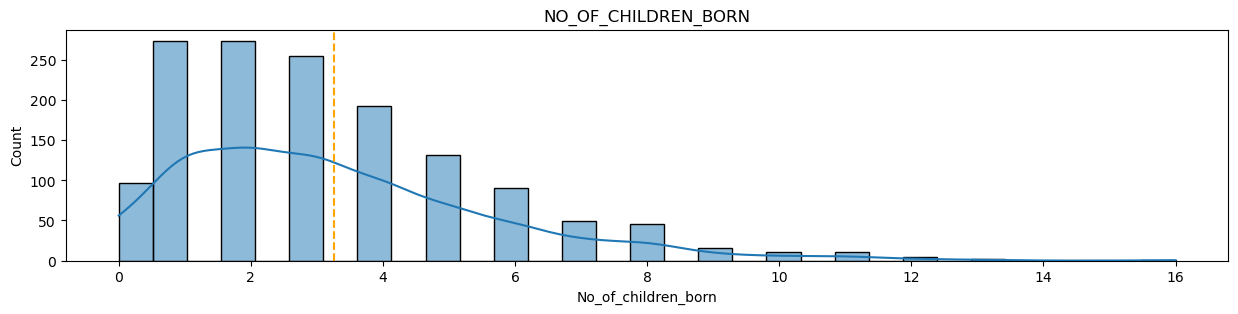

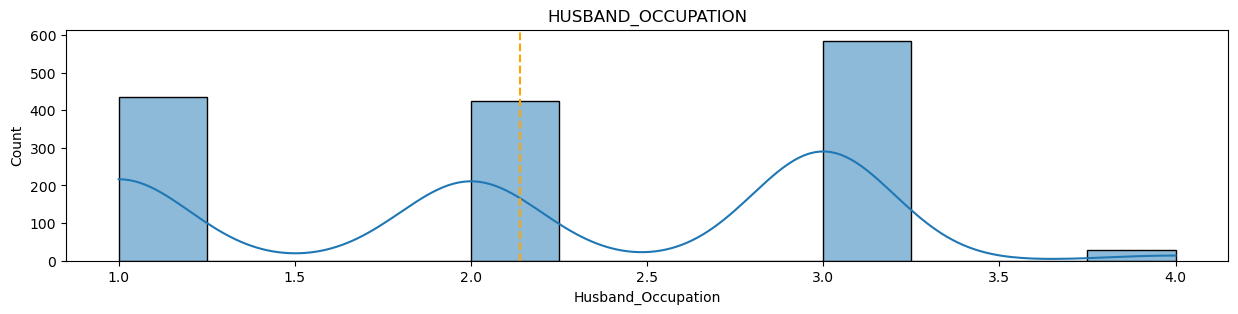

In [65]:
def plot_hist(df,num):
    for i in num:
        fig,axes = plt.subplots(figsize = (15,3))
        sns.histplot(data = df,x = i,kde=True)
        axes.set_title(i.upper())
        axes.axvline(x = df[i].mean(),color = 'orange',linestyle = '--')
plot_hist(df,num)

In [ ]:
Bivariate Analysis

<Axes: xlabel='Media_exposure ', ylabel='No_of_children_born'>

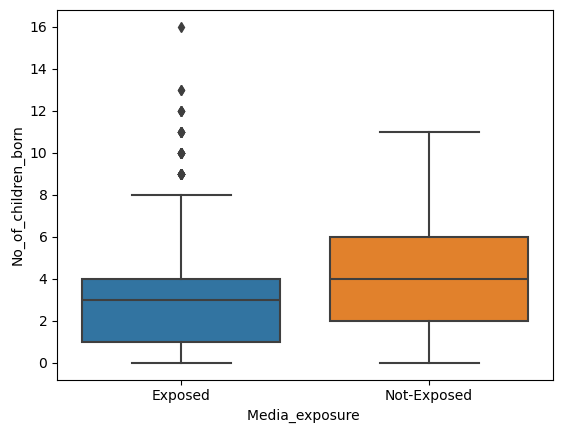

In [68]:
sns.boxplot(data=df,y="No_of_children_born",x="Media_exposure ")

<Axes: xlabel='Husband_education', ylabel='No_of_children_born'>

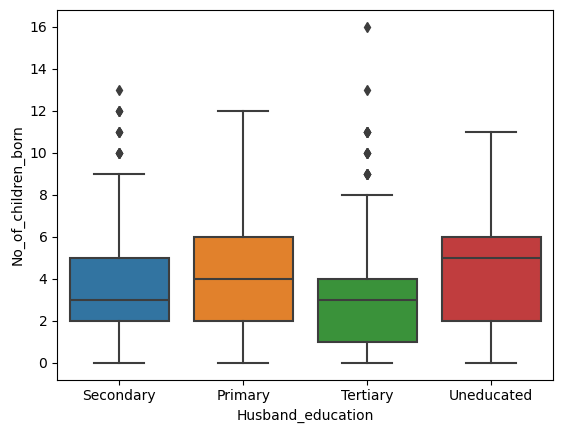

In [78]:
sns.boxplot(data=df,y="No_of_children_born",x="Husband_education")

<Axes: xlabel='Wife_religion', ylabel='No_of_children_born'>

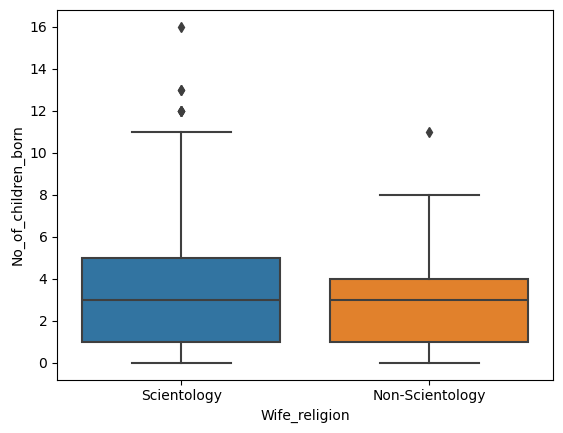

In [79]:
sns.boxplot(data=df,y="No_of_children_born",x="Wife_religion")

<Axes: xlabel='Standard_of_living_index', ylabel='No_of_children_born'>

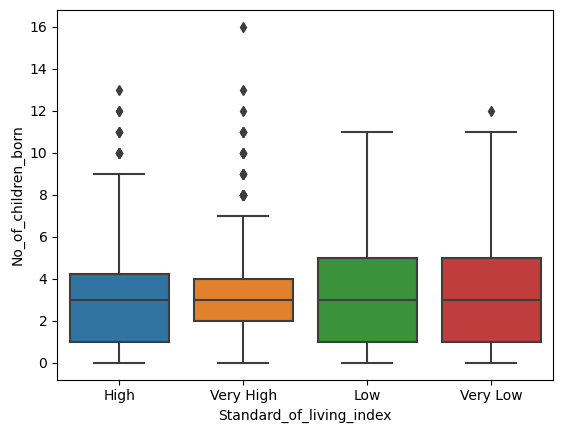

In [70]:
sns.boxplot(data=df,y="No_of_children_born",x="Standard_of_living_index")

<Axes: xlabel='Contraceptive_method_used', ylabel='Husband_Occupation'>

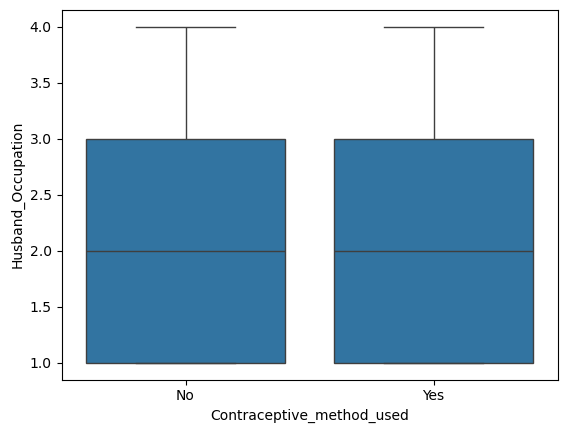

In [18]:
sns.boxplot(data=df,y="Husband_Occupation",x="Contraceptive_method_used")

<Axes: xlabel='count', ylabel='Wife_ education'>

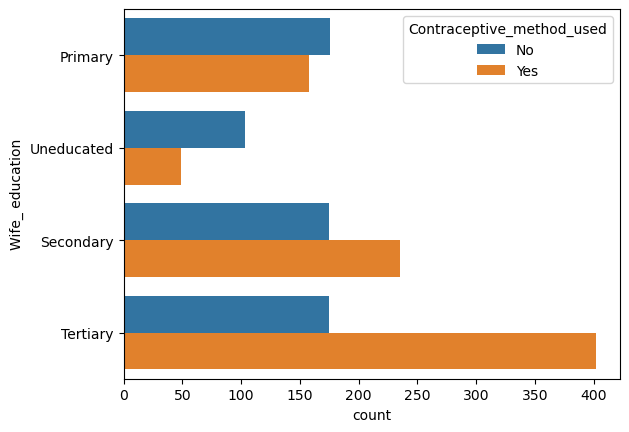

In [13]:
sns.countplot(data=df,y="Wife_ education",hue="Contraceptive_method_used")

<Axes: xlabel='count', ylabel='Contraceptive_method_used'>

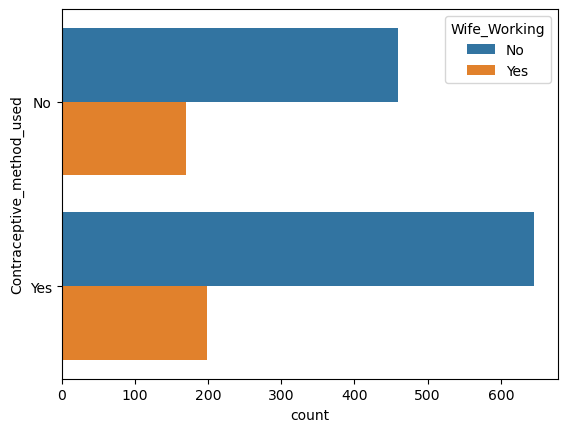

In [16]:
sns.countplot(data=df,y="Contraceptive_method_used",hue="Wife_Working")

<Axes: xlabel='Wife_age', ylabel='No_of_children_born'>

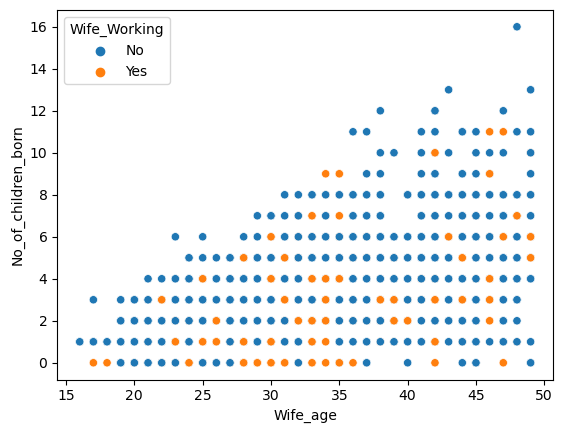

In [73]:
sns.scatterplot(data=df,y="No_of_children_born",x="Wife_age",hue="Wife_Working")

<Axes: xlabel='Wife_age', ylabel='No_of_children_born'>

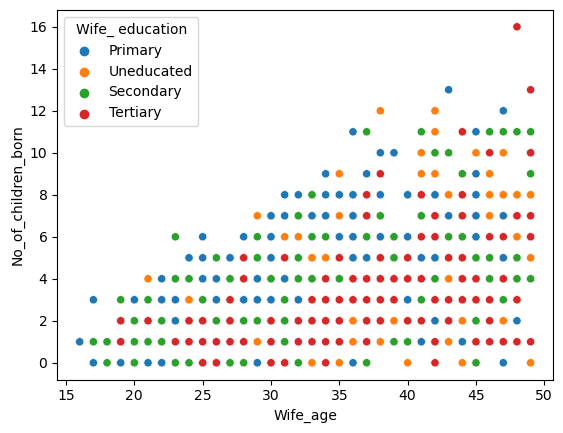

In [74]:
sns.scatterplot(data=df,y="No_of_children_born",x="Wife_age",hue="Wife_ education")

<Axes: xlabel='Wife_age', ylabel='No_of_children_born'>

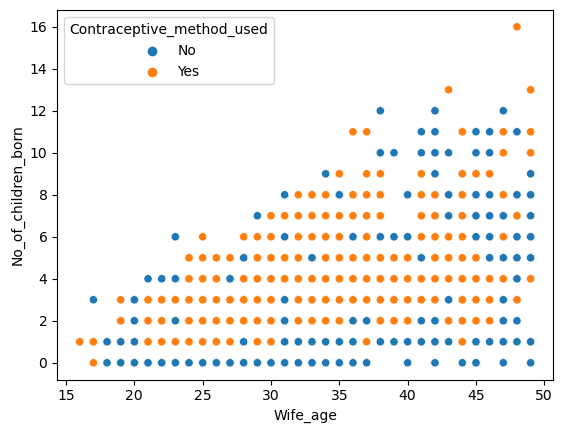

In [77]:
sns.scatterplot(data=df,y="No_of_children_born",x="Wife_age",hue="Contraceptive_method_used")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            0 non-null      float64
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   int64  
 5   Wife_Working               1473 non-null   int64  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   int64  
 9   Contraceptive_method_used  1473 non-null   int64  
 10  Husband_education          1473 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 126.7 KB


<Axes: ylabel='No_of_children_born'>

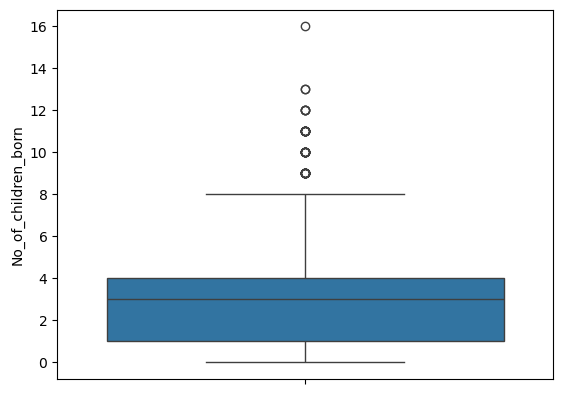

In [22]:
sns.boxplot(data=df,y="No_of_children_born")

In [23]:
from sklearn.preprocessing import LabelEncoder

In [45]:
education_mapping={'Uneducated' : 1, 'Primary': 2, 'Secondary' : 3, 'Tertiary': 4}
df["Wife_ education"]=df["Wife_ education"].map(education_mapping)
df["Husband_education"]=df["Husband_education"].map(education_mapping)
df.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [46]:
le=LabelEncoder()
df["Wife_religion"]=le.fit_transform(df["Wife_religion"])
df["Wife_Working"]=le.fit_transform(df["Wife_Working"])
df["Media_exposure "]=le.fit_transform(df["Media_exposure "])
df["Contraceptive_method_used"]=le.fit_transform(df["Contraceptive_method_used"])
df.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation Standard_of_living_index  \
0              1             0                   2                     High   
1              1             0                   3                Very High   
2              1             0                   3                Very High   
3              1             0                   3                     High   
4              1             0                   3                      Low   

   Media_exposure   Contraceptive_method_used  
0                0                          0  
1                0                          0  
2                0                          0  
3                0                          0  
4                0                          0

In [26]:
df["Standard_of_living_index"].value_counts()

Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: count, dtype: int64

In [47]:
soli_mapping = {'Very Low': 1, 'Low': 2, 'High': 3, 'Very High': 4}
df["Standard_of_living_index"]=df["Standard_of_living_index"].map(soli_mapping)
df.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         3   
1              1             0                   3                         4   
2              1             0                   3                         4   
3              1             0                   3                         3   
4              1             0                   3                         2   

   Media_exposure   Contraceptive_method_used  
0                0                          0  
1                0                          0  
2                0                          0  
3                0                          0  
4                0                          0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int64  
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int32  
 5   Wife_Working               1473 non-null   int32  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   int32  
 9   Contraceptive_method_used  1473 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 92.2 KB


<Axes: >

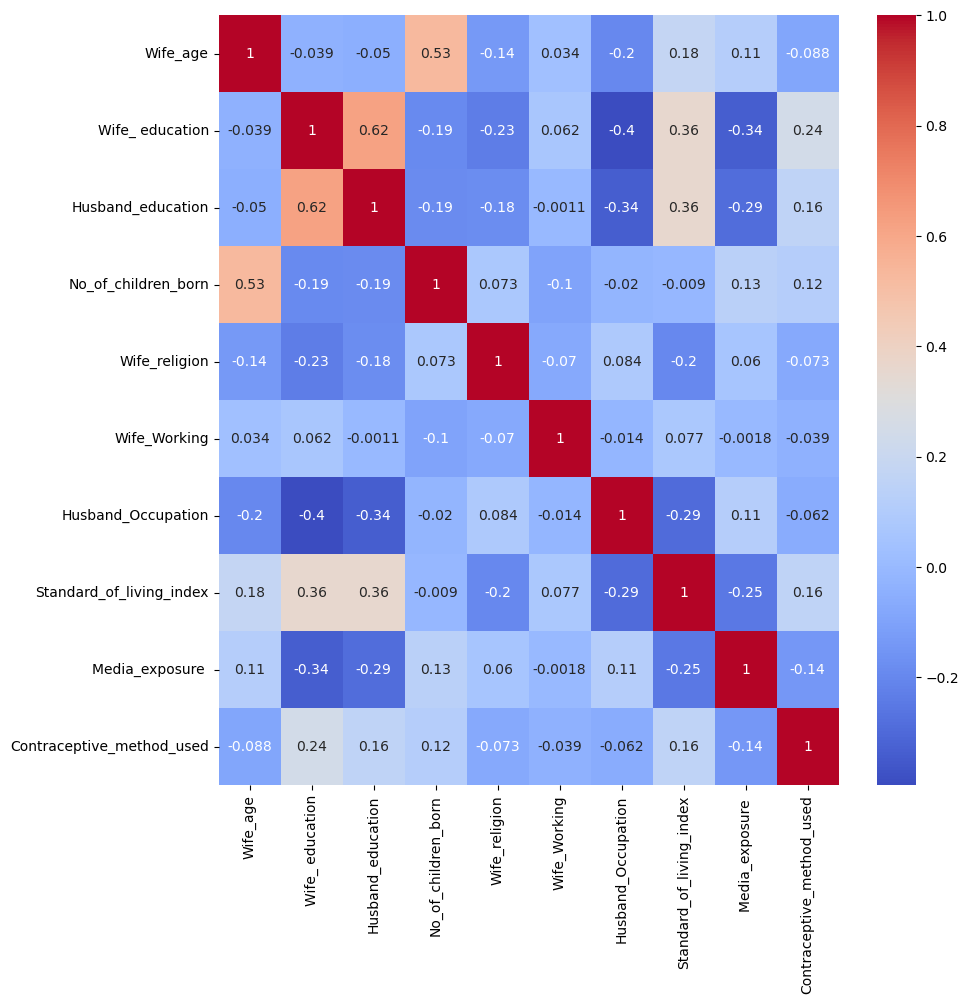

In [29]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

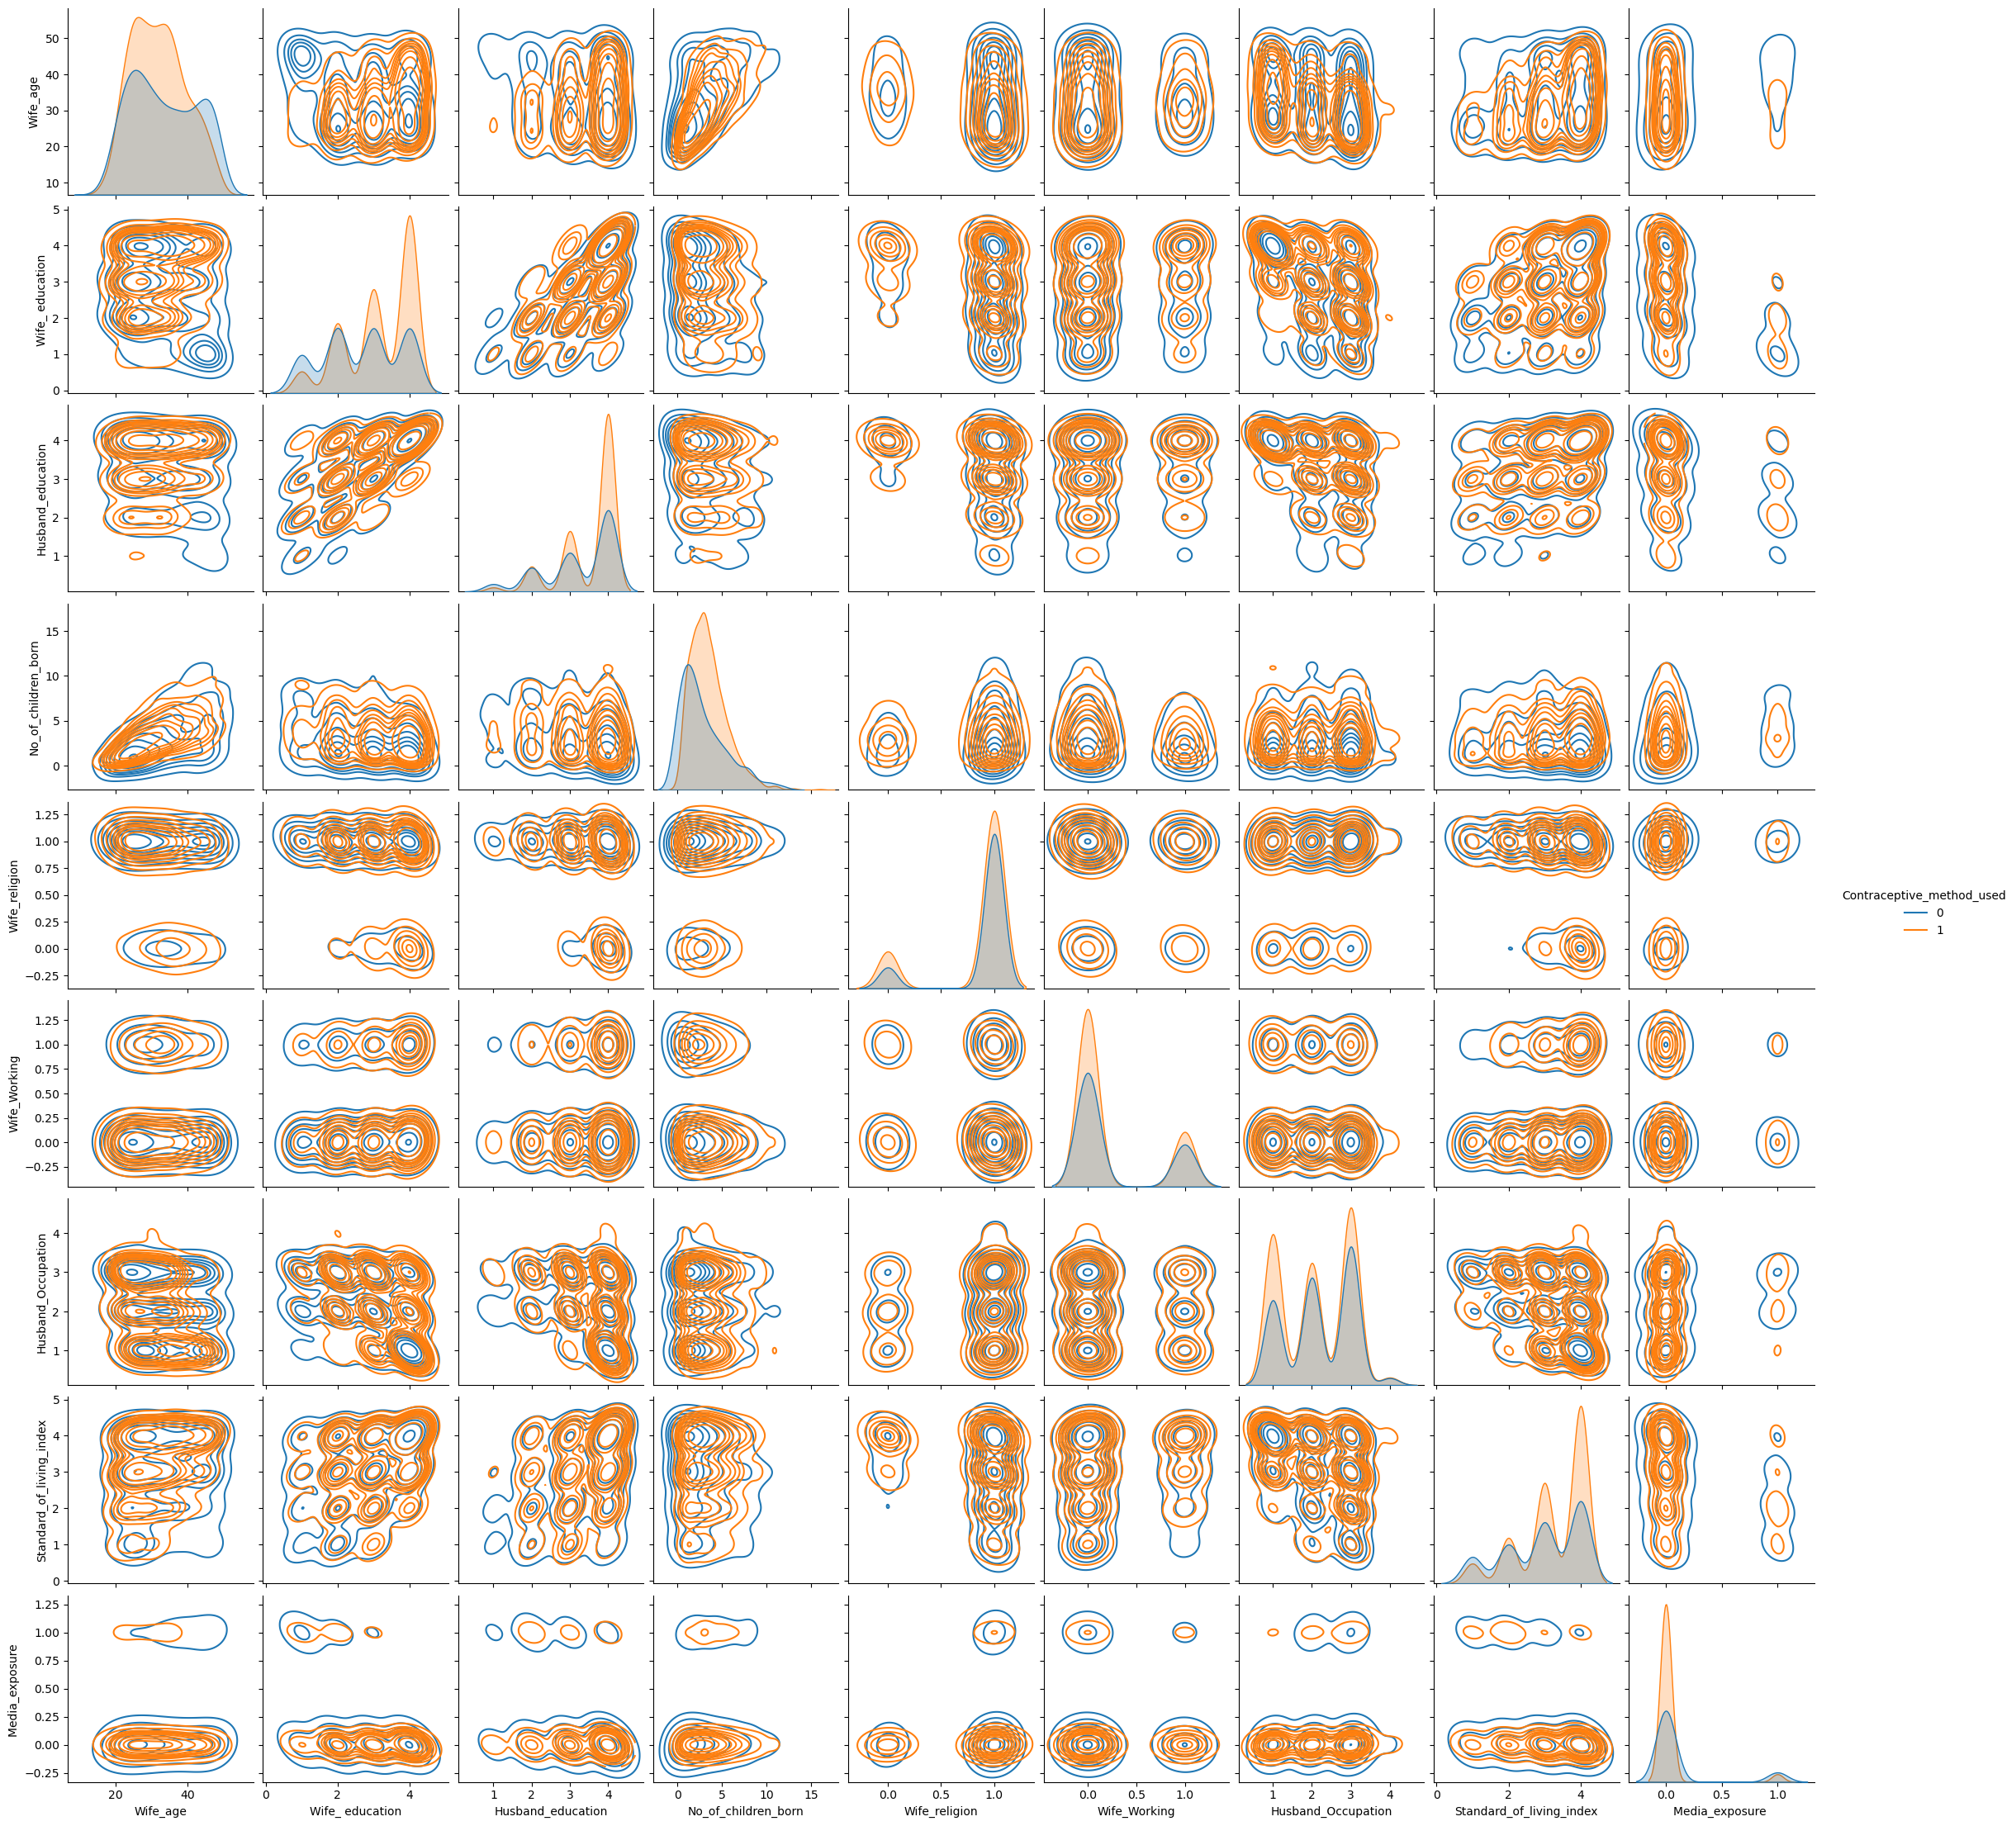

In [102]:
sns.pairplot(data=df,hue="Contraceptive_method_used",kind="kde")

We see from the pair plot that wife religion and wife working or not doesn't have much impact on the decision making whether the women
used contraceptive method or not

In [48]:
df["Wife_age"]=df["Wife_age"].fillna(df["Wife_age"].mean())
df["No_of_children_born"]=df["No_of_children_born"].fillna(df["No_of_children_born"].median())

In [20]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [144]:
df.describe()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
count  1473.000000      1473.000000        1473.000000          1473.000000   
mean     32.606277         2.958588           3.429735             3.250509   
std       8.072896         1.014994           0.816349             2.348473   
min      16.000000         1.000000           1.000000             0.000000   
25%      26.000000         2.000000           3.000000             1.000000   
50%      32.000000         3.000000           4.000000             3.000000   
75%      38.000000         4.000000           4.000000             4.000000   
max      49.000000         4.000000           4.000000            16.000000   

       Wife_religion  Wife_Working  Husband_Occupation  \
count    1473.000000   1473.000000         1473.000000   
mean        0.850645      0.250509            2.137814   
std         0.356559      0.433453            0.864857   
min         0.000000      0.000000            1.000000   
25%         1.000000      0.000000            1.000000   
50%         1.000000      0.000000            2.000000   
75%         1.000000      1.000000            3.000000   
max         1.000000      1.000000            4.000000   

       Standard_of_living_index  Media_exposure   
count               1473.000000      1473.000000  
mean                   3.133741         0.073999  
std                    0.976161         0.261858  
min                    1.000000         0.000000  
25%                    3.000000         0.000000  
50%                    3.000000         0.000000  
75%                    4.000000         0.000000  
max                    4.000000         1.000000

In [30]:
X=df.drop("Contraceptive_method_used",axis=1)
y=df.pop("Contraceptive_method_used")

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [32]:
len(X_train)

1031

In [33]:
len(X_test)

442

In [39]:
model=LogisticRegression()
model.fit(X_train,y_train)


C:\Users\jayee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
model_score_test=model.score(X_test,y_test)
model_score_test

0.6877828054298643

In [41]:
model_score_train=model.score(X_train,y_train)
model_score_train

0.6692531522793405

In [42]:
y_predict=model.predict(X_train)
print(metrics.classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54       436
           1       0.68      0.82      0.74       595

    accuracy                           0.67      1031
   macro avg       0.66      0.64      0.64      1031
weighted avg       0.67      0.67      0.66      1031



In [186]:
y_predict=model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

[[ 94  99]
 [ 39 210]]
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       193
           1       0.68      0.84      0.75       249

    accuracy                           0.69       442
   macro avg       0.69      0.67      0.66       442
weighted avg       0.69      0.69      0.68       442



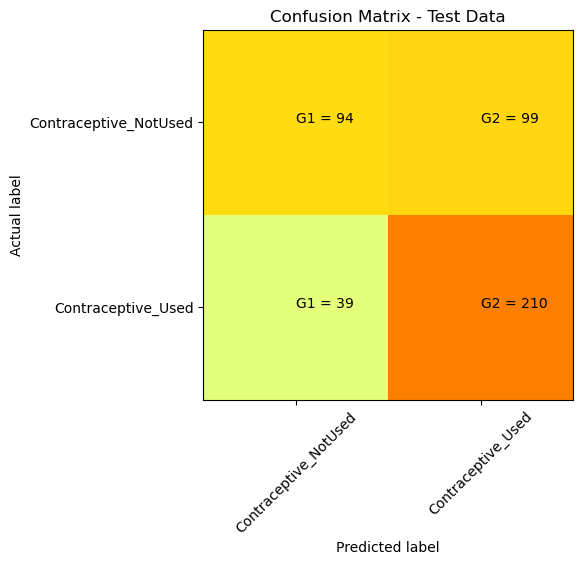

In [187]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Contraceptive_NotUsed', 'Contraceptive_Used']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Scaling before LDA

In [49]:
df.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                2                  3                  3.0   
1      45.0                1                  3                 10.0   
2      43.0                2                  3                  7.0   
3      42.0                3                  2                  9.0   
4      36.0                3                  3                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         3   
1              1             0                   3                         4   
2              1             0                   3                         4   
3              1             0                   3                         3   
4              1             0                   3                         2   

   Media_exposure   Contraceptive_method_used  
0                0                          0  
1                0                          0  
2                0                          0  
3                0                          0  
4                0                          0

In [50]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df_scale=pd.DataFrame(mm.fit_transform(df),columns=df.columns)
df_scale.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0  0.242424         0.333333           0.666667               0.1875   
1  0.878788         0.000000           0.666667               0.6250   
2  0.818182         0.333333           0.666667               0.4375   
3  0.787879         0.666667           0.333333               0.5625   
4  0.606061         0.666667           0.666667               0.5000   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0            1.0           0.0            0.333333                  0.666667   
1            1.0           0.0            0.666667                  1.000000   
2            1.0           0.0            0.666667                  1.000000   
3            1.0           0.0            0.666667                  0.666667   
4            1.0           0.0            0.666667                  0.333333   

   Media_exposure   Contraceptive_method_used  
0              0.0                        0.0  
1              0.0                        0.0  
2              0.0                        0.0  
3              0.0                        0.0  
4              0.0                        0.0

In [51]:
X2=df_scale.drop("Contraceptive_method_used",axis=1)
y2=df_scale.pop("Contraceptive_method_used")

In [52]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X2,y2,test_size=0.3,random_state=1)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [53]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X1_train,y1_train)
model

LinearDiscriminantAnalysis()

In [54]:
print(model.score(X1_train,y1_train))

0.6663433559650824


In [55]:
print(model.score(X1_test,y1_test))

0.6855203619909502


In [56]:
metrics.confusion_matrix(y1_test, model.predict(X1_test))

array([[ 92, 101],
       [ 38, 211]], dtype=int64)

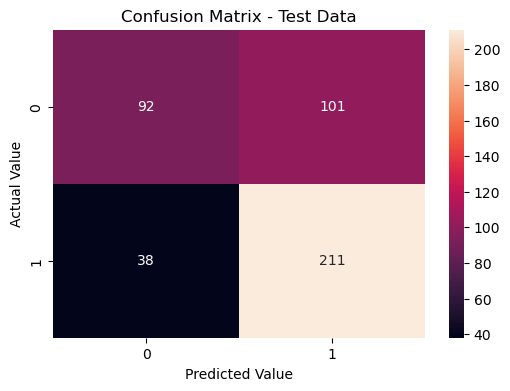

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(metrics.confusion_matrix(y1_test, model.predict(X1_test)),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix - Test Data')
plt.show();

In [58]:
print(metrics.classification_report(y1_train, model.predict(X1_train)))

              precision    recall  f1-score   support

         0.0       0.65      0.46      0.54       436
         1.0       0.67      0.82      0.74       595

    accuracy                           0.67      1031
   macro avg       0.66      0.64      0.64      1031
weighted avg       0.66      0.67      0.65      1031



In [59]:
print(metrics.classification_report(y1_test, model.predict(X1_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.48      0.57       193
         1.0       0.68      0.85      0.75       249

    accuracy                           0.69       442
   macro avg       0.69      0.66      0.66       442
weighted avg       0.69      0.69      0.67       442



In [218]:
model.intercept_

array([-0.62616273])

In [219]:
model.coef_

array([[-2.2924582 ,  1.69891085, -0.11285639,  4.82647048, -0.48570938,
        -0.0209727 ,  0.23537788,  0.7053727 , -0.50470286]])

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_model.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=1)

In [65]:
print(dt_model.score(X1_train,y1_train))

0.9835111542192047


In [66]:
print(dt_model.score(X1_test,y1_test))

0.6787330316742082


In [224]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X1_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.363684
No_of_children_born       0.227935
Wife_ education           0.088841
Standard_of_living_index  0.085327
Husband_Occupation        0.082844
Husband_education         0.064172
Wife_Working              0.041319
Wife_religion             0.034643
Media_exposure            0.011234


Classification report on the train data

In [228]:
print(metrics.classification_report(y1_train, dt_model.predict(X1_train)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       436
         1.0       1.00      0.97      0.99       595

    accuracy                           0.98      1031
   macro avg       0.98      0.99      0.98      1031
weighted avg       0.98      0.98      0.98      1031



Classification report on the test data

In [227]:
print(metrics.classification_report(y1_test, dt_model.predict(X1_test)))

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63       193
         1.0       0.71      0.71      0.71       249

    accuracy                           0.68       442
   macro avg       0.67      0.67      0.67       442
weighted avg       0.68      0.68      0.68       442



In [68]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20,25],
              'min_samples_leaf':[10,15,20,30],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X1_train, y1_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [10, 15, 20, 30]},
             verbose=True)

In [69]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                       min_samples_leaf=30, random_state=123)

In [70]:
reg_dt_model = DecisionTreeClassifier(ccp_alpha=0.001,criterion='entropy', max_depth=5, min_samples_leaf=30,random_state=123)
reg_dt_model.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=5,
                       min_samples_leaf=30, random_state=123)

In [71]:
print(reg_dt_model.score(X1_train,y1_train))

0.7352085354025218


In [72]:
print(reg_dt_model.score(X1_test,y1_test))

0.7171945701357466


In [256]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X1_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.473026
Wife_age                  0.288600
Wife_ education           0.206439
Standard_of_living_index  0.031935
Husband_education         0.000000
Wife_religion             0.000000
Wife_Working              0.000000
Husband_Occupation        0.000000
Media_exposure            0.000000


In [257]:
print(metrics.classification_report(y1_train, reg_dt_model.predict(X1_train)))

              precision    recall  f1-score   support

         0.0       0.78      0.52      0.62       436
         1.0       0.72      0.90      0.80       595

    accuracy                           0.74      1031
   macro avg       0.75      0.71      0.71      1031
weighted avg       0.74      0.74      0.72      1031



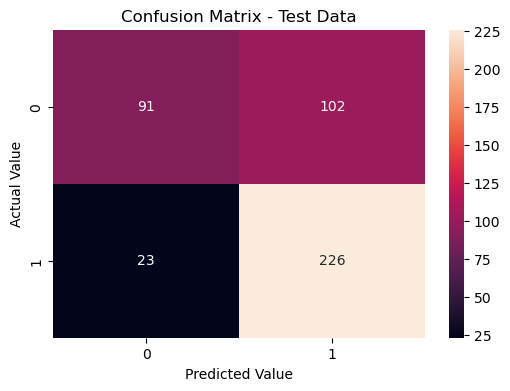

In [73]:
plt.figure(figsize=(6,4))
sns.heatmap(metrics.confusion_matrix(y1_test, reg_dt_model.predict(X1_test)),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix - Test Data')
plt.show();

In [258]:
print(metrics.classification_report(y1_test, reg_dt_model.predict(X1_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.47      0.59       193
         1.0       0.69      0.91      0.78       249

    accuracy                           0.72       442
   macro avg       0.74      0.69      0.69       442
weighted avg       0.74      0.72      0.70       442



In [259]:
print(metrics.confusion_matrix(y1_test, reg_dt_model.predict(X1_test)))

[[ 91 102]
 [ 23 226]]


AUC: 0.798


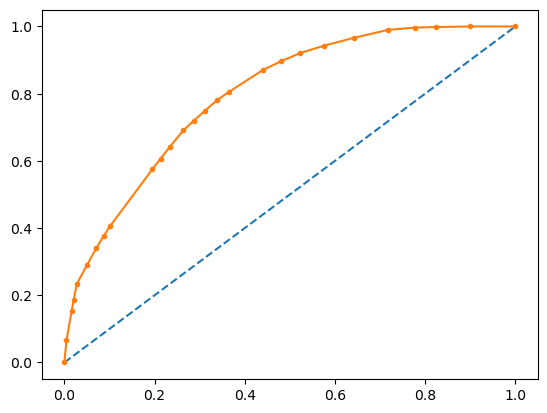

In [238]:
# predict probabilities
probs = reg_dt_model.predict_proba(X1_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y1_train, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

AUC: 0.754


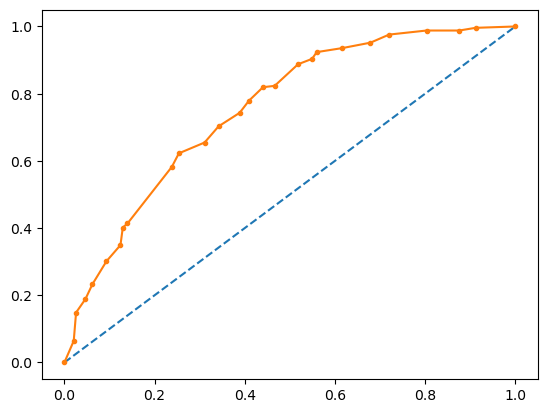

In [239]:
# predict probabilities
probs = reg_dt_model.predict_proba(X1_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y1_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()